# Introduction to Keras and TensorFlow

## What's TensorFlow?

- Python-based, free, open source machine learning platporm
- Numpy와 같이 mathematical expression over numerical tensors을 조작할 수 있게 해 주다, 다음과 같은 방식으로 numpy를 훨씬 뛰어넘는다. 


1.   automatically compute the gradient of any differentiable expression 
2.   CPU뿐 아니라 CPU와 TPU에서도 실행할 수 있다. 
3. TensorFlow에 의해 정의된 computation은 다른 machin에도 쉽게 분산될 수 있다. 
4. c++, java등 다른 환경에서도 잘 돌아가 쉽게 배포가 가능하다.



## What's Keras?

- Keras는 Tensorflow 위에 구축된 파이썬용 Deeplearning API이다.


## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

low-level tensor manipulation : translates to TensorFlow APIs   
high-level tensor manupulation : translates to Keras APIs

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [17]:
import tensorflow as tf
x = tf.ones(shape=(2, 1)) # 모든 원소가 1인 텐서 생성
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [18]:
x = tf.zeros(shape=(2, 1)) # 모든 원소가 0인 텐서 생성
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [19]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.) # 표준화 정규분포에서 랜덤 텐서 생성 
print(x)

tf.Tensor(
[[ 0.08275485]
 [ 0.47355804]
 [-0.49199578]], shape=(3, 1), dtype=float32)


In [20]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.) # uniform distn에서 랜덤 텐서 생성 
print(x)

tf.Tensor(
[[0.77727115]
 [0.0137347 ]
 [0.48286545]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [21]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0. # numpy array are assignable

In [22]:
x = tf.ones(shape = (2,2))
x[0,0] = 0. # tensorflow tensor is not assignable 

TypeError: ignored

**Creating a TensorFlow variable**

In [24]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.08745287],
       [-0.7663186 ],
       [-1.4355539 ]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [25]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [26]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [27]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [28]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

#### A second look at the GradientTape API

**Using the `GradientTape`**

In [29]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

**Using `GradientTape` with constant tensor inputs**

In [30]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const) # constant tensor inputs을 사용할 경우 tape,watch()로 수동 추적표시
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**Using nested gradient tapes to compute second-order gradients**

In [31]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time) # use outer tape to compute the gradient of the gradient from the inner tape.

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [32]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal( # 다변량 정규분포
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [33]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [34]:
inputs

array([[-0.21629365,  2.9524333 ],
       [ 0.3975571 ,  3.1851184 ],
       [ 1.3117993 ,  3.1214895 ],
       ...,
       [ 1.6380526 , -1.2518129 ],
       [ 1.1226683 , -0.90682447],
       [ 3.8630428 , -0.16162129]], dtype=float32)

**Generating the corresponding targets (0 and 1)**

In [35]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

In [36]:
targets

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

**Plotting the two point classes**

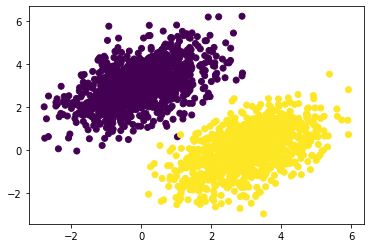

In [37]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

affine transformation ( prediction = W * input + b ) trained to minimize the square of the difference between predictions and the targets

In [38]:
input_dim = 2 # input dim은 2d points
output_dim = 1 # output dim은 single score (0 또는 1) 
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [39]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [40]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [41]:
learning_rate = 0.1 # 학습률 :한 번 학습할 때 얼마만큼 학습해야 하는지, 한 번의 학습량으로 학습한 이후에 가중치 매개변수가 갱신된다.

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [42]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}") # training loss는 0.025 정도 

Loss at step 0: 0.5024
Loss at step 1: 0.1550
Loss at step 2: 0.1015
Loss at step 3: 0.0886
Loss at step 4: 0.0823
Loss at step 5: 0.0772
Loss at step 6: 0.0728
Loss at step 7: 0.0687
Loss at step 8: 0.0650
Loss at step 9: 0.0615
Loss at step 10: 0.0584
Loss at step 11: 0.0555
Loss at step 12: 0.0529
Loss at step 13: 0.0505
Loss at step 14: 0.0483
Loss at step 15: 0.0463
Loss at step 16: 0.0445
Loss at step 17: 0.0428
Loss at step 18: 0.0412
Loss at step 19: 0.0398
Loss at step 20: 0.0385
Loss at step 21: 0.0374
Loss at step 22: 0.0363
Loss at step 23: 0.0353
Loss at step 24: 0.0344
Loss at step 25: 0.0335
Loss at step 26: 0.0328
Loss at step 27: 0.0321
Loss at step 28: 0.0314
Loss at step 29: 0.0308
Loss at step 30: 0.0303
Loss at step 31: 0.0298
Loss at step 32: 0.0294
Loss at step 33: 0.0290
Loss at step 34: 0.0286
Loss at step 35: 0.0282
Loss at step 36: 0.0279
Loss at step 37: 0.0276
Loss at step 38: 0.0274
Loss at step 39: 0.0271


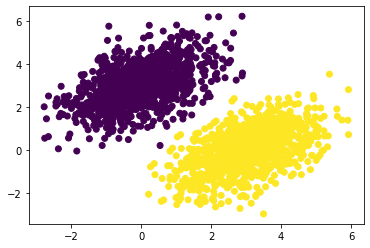

In [43]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5) # 0.5보다 작으면 0으로, 크면 1로 분류될 것 
plt.show()

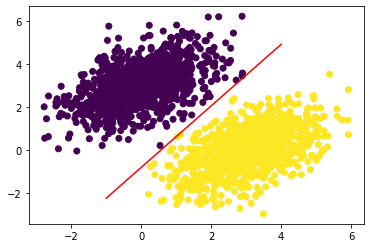

In [44]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]  # w1 * x + w2 * y + b = 0.5 
plt.plot(x, y, "-r") # "-r" -> plot it as a red line
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

layer : fundamantal data structure in neural networks  
different type of layer are appropriate for different tensor formats and different types of data proccessing  
- rank-2 tensor (samples, features) : often processed by **densely connected layers**
- rank-3 tensor (samples, timesteps, features) : often processed by **recurrent layers (such as LSTM) or 1D convollution layers**
- rank-4 tensor (image  data) : often processed by **2D convollution layers**


#### The base Layer class in Keras

weight : defined in a `build()`  
computation : defined in `call()`  

**A `Dense` layer implemented as a `Layer` subclass**

In [45]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer): # all deras layers inherit from the base Layer calss 

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [46]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784)) # create test input
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

layer compatibility -> every layer will only accept input tensors of a certail shape and will return output tensors of a certain shape.   
Using Keras, layers you add to your models are dymanically built to match the shape of the incoming layer. 

In [47]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu") 

In [48]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [49]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

model architecture가 정의된 후 다음 3가지를 선택해야 함  
1. loss function : 최소화해야 함. 얼마나 모델이 성공적인지를 나타내는 척도
2. optimizer : loss function을 기반으로 네트워크 업데이트 방법을 결정. SGD의 특정 변형을 구현
3. metrics : the measures of success you want to monitor during traing and valitation. loss와 달리 트레이닝은 merics에 대해 optimize 하지 않는다.

In [50]:
model = keras.Sequential([keras.layers.Dense(1)]) # define a linear clssifier
model.compile(optimizer="rmsprop", 
              loss="mean_squared_error",
              metrics=["accuracy"]) 

In [51]:
# also possible to sqecify these arguments as object instance
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

compile -> fit  
traing loot  
- data : 일반적으로 numpy array 혹은 tensorflow dataset 형태
- number of epochs : training loop를 몇 번 반복할 것인지
- batch size : 

**Calling `fit()` with NumPy data**

In [52]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 1s 2ms/step - loss: 0.7363 - binary_accuracy: 0.9970
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 0.6401 - binary_accuracy: 0.9970
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 0.5640 - binary_accuracy: 0.9965
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 0.4952 - binary_accuracy: 0.9960
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 0.4318 - binary_accuracy: 0.9955


In [53]:
history.history

{'binary_accuracy': [0.996999979019165,
  0.996999979019165,
  0.9965000152587891,
  0.9959999918937683,
  0.9955000281333923],
 'loss': [0.7362502217292786,
  0.6401471495628357,
  0.5640371441841125,
  0.49522730708122253,
  0.4318046569824219]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [54]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

# to avoid having samples from only one calss in validation data 
indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

# 30% training data for validation  
num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit( # training loop 
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 4ms/step - loss: 0.0976 - binary_accuracy: 0.9357 - val_loss: 0.0499 - val_binary_accuracy: 0.9933
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0679 - binary_accuracy: 0.9579 - val_loss: 0.0393 - val_binary_accuracy: 0.9883
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0730 - binary_accuracy: 0.9657 - val_loss: 0.1064 - val_binary_accuracy: 0.9067
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0742 - binary_accuracy: 0.9557 - val_loss: 0.0663 - val_binary_accuracy: 0.9817
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0745 - binary_accuracy: 0.9557 - val_loss: 0.0453 - val_binary_accuracy: 0.9917


### Inference: Using a model after training

In [56]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[0.1749362 ]
 [0.17719924]
 [0.78964204]
 [0.86111736]
 [0.01537555]
 [0.9657452 ]
 [1.0956361 ]
 [0.7019807 ]
 [0.95291877]
 [0.1628361 ]]


## Summary